<a href="https://colab.research.google.com/github/ayeshagunarathne/Medical_image_classification/blob/main/BreastMNIST_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Useful links/resources to learn about **Convolution Neural Networks (CNNs)**

1. The CNN basics -[Link to Youtube video](https://www.youtube.com/watch?v=2xqkSUhmmXU&t=1175s)

2. Medium blog with a better explanantion about CNN architechture -[towardsdatascience.com]( https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac)

3. Medium blog with in detail mathematics of CNNs - [towardsdatascience.com](https://towardsdatascience.com/the-math-behind-convolutional-neural-networks-6aed775df076)

Few Research papers related to CNNS:
1. [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
2. [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
3. [An Introduction to Convolutional Neural Networks](https://arxiv.org/abs/1511.08458)


**Developing a Classification model using Pytorch**

Dataset source: https://zenodo.org/records/10519652
https://medmnist.com/


Dataset Description:
**BreastMNIST** is a medical image dataset specifically focused on breast ultrasound images. It is designed for binary classification tasks, aiming to differentiate between benign and malignant breast tumors.

Modality: Breast ultrasound images.
Image Size: The images are resized to 224x224 pixels.
Channels: The images are grayscale.

**The dataset contains two classes:**

**0: Benign tumors** ( Negative class)

**1: Malignant tumors** (Positive class)

The labels are provided as binary values corresponding to the two classes.

**STEP 1 : Loading the data from breastmnist_224.npy file (Here the data will get loaded as numpy arrays)**



In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import random


#mounting the google drive
drive.mount('/content/drive')

# Define the path to your file
#breast_mnist_224.npz file is downloaded from the original source website and uploaded to google drive
file_path = '/content/drive/My Drive/Colab Notebooks/breastmnist_224.npz'

#Loading the .npz file
#note: .npz is a compressed file format used by numpy.This format allows you to save multiple NumPy arrays into a single file, which can then be efficiently loaded back into a Python program.
data = np.load(file_path)

# Checking the available arrays in the file
print(data.files)

# Accessing a specific array by its name
Test_images = data['test_images']
Train_images = data['train_images']
Val_images = data['val_images']
Test_labels = data['test_labels']
Train_labels = data['train_labels']
Val_labels = data['val_labels']


# checking the shape of the arrays available in the data
print(f"Test image array shape: {Test_images.shape}")
print(f"Train image array shape: {Train_images.shape}")
print(f"Validation image array shape: {Val_images.shape}")
print(f"Test label array shape: {Test_labels.shape}")
print(f"Train label array shape: {Train_labels.shape}")
print(f"Validation label array shape: {Val_labels.shape}")



Mounted at /content/drive
['train_images', 'train_labels', 'val_images', 'val_labels', 'test_images', 'test_labels']
Test image array shape: (156, 224, 224)
Train image array shape: (546, 224, 224)
Validation image array shape: (78, 224, 224)
Test label array shape: (156, 1)
Train label array shape: (546, 1)
Validation label array shape: (78, 1)


**STEP 2 : Creating a custom dataset class**

Here we create a custom dataset class that converts the NumPy arrays to PyTorch tensors and the handles transformations.

In [ ]:
import torch  #importing pytorch library
from torch.utils.data import Dataset, DataLoader  #importing Dataset and DataLoader classes from pytorch
'''
Explanation about Dataset and DataLoader classes:

The Dataset class in PyTorch is an abstract base class that provides a standard way to represent datasets.
It is designed to be inherited by our custom dataset classes. By doing this, we can ensure that your datasets are
compatible with PyTorch's data handling utilities, such as the DataLoader, which can efficiently load and preprocess data in batches.

Usage: Subclassing Dataset to Create a Custom Dataset
To create a custom dataset in PyTorch, we subclass the Dataset class and implement two essential methods:

1. __len__ Method: This method returns the total number of samples in our dataset. PyTorch uses this to determine the size of our dataset.

2. __getitem__ Method: This method retrieves a single data sample and its corresponding label by index. It allows us to access each data point in the dataset individually.
This method is called repeatedly by the DataLoader to create batches of data for training or evaluation.

The DataLoader class wraps a dataset and provides an iterable over the dataset with support for automatic batching, shuffling, and parallel data loading.
we use DataLoader to efficiently load data in batches during training and evaluation.

'''

from torchvision import transforms  #importing transforms module from torchvision library

"""
Explanation about transforms module:
The transforms module in PyTorch's torchvision library provides a suite of tools to perform common data transformations.
These transformations are especially useful for preprocessing image data before feeding it into a neural network.
Typical transformations include normalization, resizing, cropping, flipping, rotation, and converting images to tensors. """

from PIL import Image

"""
Explanation about PIL (Python Imaging Library):
PIL (Python Imaging Library): A library in Python that provides extensive support for working with images.
It includes capabilities for opening, manipulating, and saving many different image file formats.
Pillow: PIL is now maintained under the name Pillow, which is an actively maintained fork of the original PIL library.

The PIL/Pillow library is used to perform a wide range of image processing tasks, such as:
Opening: Loading images from files.
Manipulating: Performing operations such as cropping, resizing, rotating, filtering, and transforming images.
Saving: Writing images to files in various formats.
"""

class BreastMnistDataset(Dataset):      #The BreastMnistDataset class inherits from original Dataset class.So here parent class = Dataset
    """Breast MNIST dataset"""           # This is a docstring- this provides a brief description about class

    def __init__(self, images, labels, transform=None):     # This is the constructor - and it initialize an instance of the BreastMnistDataset class.It takes 3 arguments - images,labels and transform
        self.images = images
        self.labels = labels
        self.transform = transform

        """Attribute Initialization
           self.images = images: Stores the image data in an instance variable self.images.
           self.labels = labels: Stores the labels in an instance variable self.labels.
           self.transform = transform: Stores the transform function in an instance variable self.transform.


           Here self is used to refer to the instance of the class.
           When we define methods within a class, the first parameter of each method must be self, which allows us to access attributes and methods of the class within the method.
        """

        """The two methods, __len__ and __getitem__, are essential parts of a custom dataset class in PyTorch.
        They allow PyTorch to interact with our dataset effectively, enabling functionalities such as batching and shuffling during training
        """


    def __len__(self):
        return len(self.images)

        """This method (__len__)returns the total number of samples in the dataset.It is necessary for PyTorch to know how many samples are available,
        especially when iterating through the dataset in a training loop or when splitting the data into batches.

        """

    def __getitem__(self, index):
        img = self.images[index]
        label = self.labels[index]

        # Convert numpy array to PIL Image
        img = Image.fromarray(img.astype('uint8'))

        # PyTorch's transforms module and many image processing functions in Python work with PIL Images. Converting the image to a PIL Image makes it compatible with these functions.
        #img.astype('uint8'): Ensures that the image data type is uint8 (unsigned 8-bit integer), which is a common format for image data.

        if self.transform is not None:
            img = self.transform(img)

            #This applies specified transformations into images. Transformations are often used for data augmentation (e.g., random cropping, flipping) or normalization (e.g., scaling pixel values).
            #The check if self.transform is not None ensures that the transformation is applied only if it has been specified during the dataset initialization.

        return img, label


    """Purpose of __getitem__:

             This method ( __getitem__) retrieves a single sample (an image and its corresponding label) from the dataset at the specified index.
             It allows PyTorch to access individual data samples, which is crucial for batching and shuffling operations during training.
             Parameters:

             index: An integer value representing the position of the sample in the dataset.
             How It Works:

            img = self.images[index]: Fetches the image at the specified index from self.images.
            label = self.labels[index]: Fetches the corresponding label at the specified index from self.labels.
            return img, label: Returns a tuple containing the image and its corresponding label.
            """

# Data transformations (including augmentations )
"""
About Data Augmentations:

When applying data augmentation, the number of original images in the dataset remains the same;
 however, each epoch sees different augmented versions of these images. This means that the dataset size doesn't change, but the diversity of the data seen by the model during training is increased.
If we want to increase the actual number of images in your dataset (e.g., to augment our dataset by a specific factor), we need to save augmented versions of the images and create a larger dataset.

"""


train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

"""
Explanation about transforms.Compose:
transforms.Compose is used to chain together multiple transformations. It takes a list of transformation objects and returns a single transformation that applies each of them in sequence.

In this case, it combines transforms.ToTensor() and transforms.Normalize((0.5,), (0.5,)).

transforms.ToTensor - Converts a PIL Image or a NumPy ndarray with shape (H x W x C) and values in the range [0, 255] to a PyTorch Tensor of shape (C x H x W) and values in the range [0.0, 1.0].
This transformation is essential for converting image data into a format that PyTorch can work with. Neural networks in PyTorch expect inputs as tensors, and transforms.ToTensor ensures the images are in the right format.

transforms.Normalize - Normalizes the tensor image with mean and standard deviation.
The normalization formula is: Normalized Image = (Image - mean) /std
In this case, it normalizes each pixel value using the mean 0.5 and standard deviation 0.5.
This normalization can help in stabilizing and accelerating the training process.
"""



#Below lines create instances of the BreastMnistDataset class for training, validation, and testing datasets.
# Creating datasets
train_dataset = BreastMnistDataset(Train_images, Train_labels, transform=train_transform)
val_dataset = BreastMnistDataset(Val_images, Val_labels, transform=val_transform)
test_dataset = BreastMnistDataset(Test_images, Test_labels, transform=test_transform)


"""Below lines create data loaders for the training, validation, and testing datasets.
DataLoader is a PyTorch utility that abstracts the complexity of loading data in mini-batches and shuffling the data.
train_loader, val_loader, and test_loader are now iterable objects that will provide batches of data when used in a training loop.

The num_workers can be used for parallel processing

Here, we add more features with the help of DataLoader:
Batching the data
Shuffling the data
Load the data in parallel using multiprocessing workers.

torch.utils.data.DataLoader is an iterator which provides all these features. Parameters used should be clear.
One parameter of interest is collate_fn. we can specify how exactly the samples need to be batched using collate_fn. However, default collate should work fine for most use cases."""

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,num_workers=0)


#we can use below lines to understand how the dataset labels are arranged.This understanding on the positive and negative classes of the dataset is important.
from collections import Counter

# Calculate class distribution
class_distribution = Counter(label.item() for _, label in train_dataset)
print(f"The class distribution of training dataset: {class_distribution}")

class_distribution = Counter(label.item() for _, label in test_dataset)
print(f"The class distribution of test dataset: {class_distribution}")

class_distribution = Counter(label.item() for _, label in val_dataset)
print(f"The class distribution of validation dataset: {class_distribution}")


The class distribution of training dataset: Counter({1: 399, 0: 147})
The class distribution of test dataset: Counter({1: 114, 0: 42})
The class distribution of validation dataset: Counter({1: 57, 0: 21})


####Step 3 - Visualizing Training, Testing and Validations datatsets


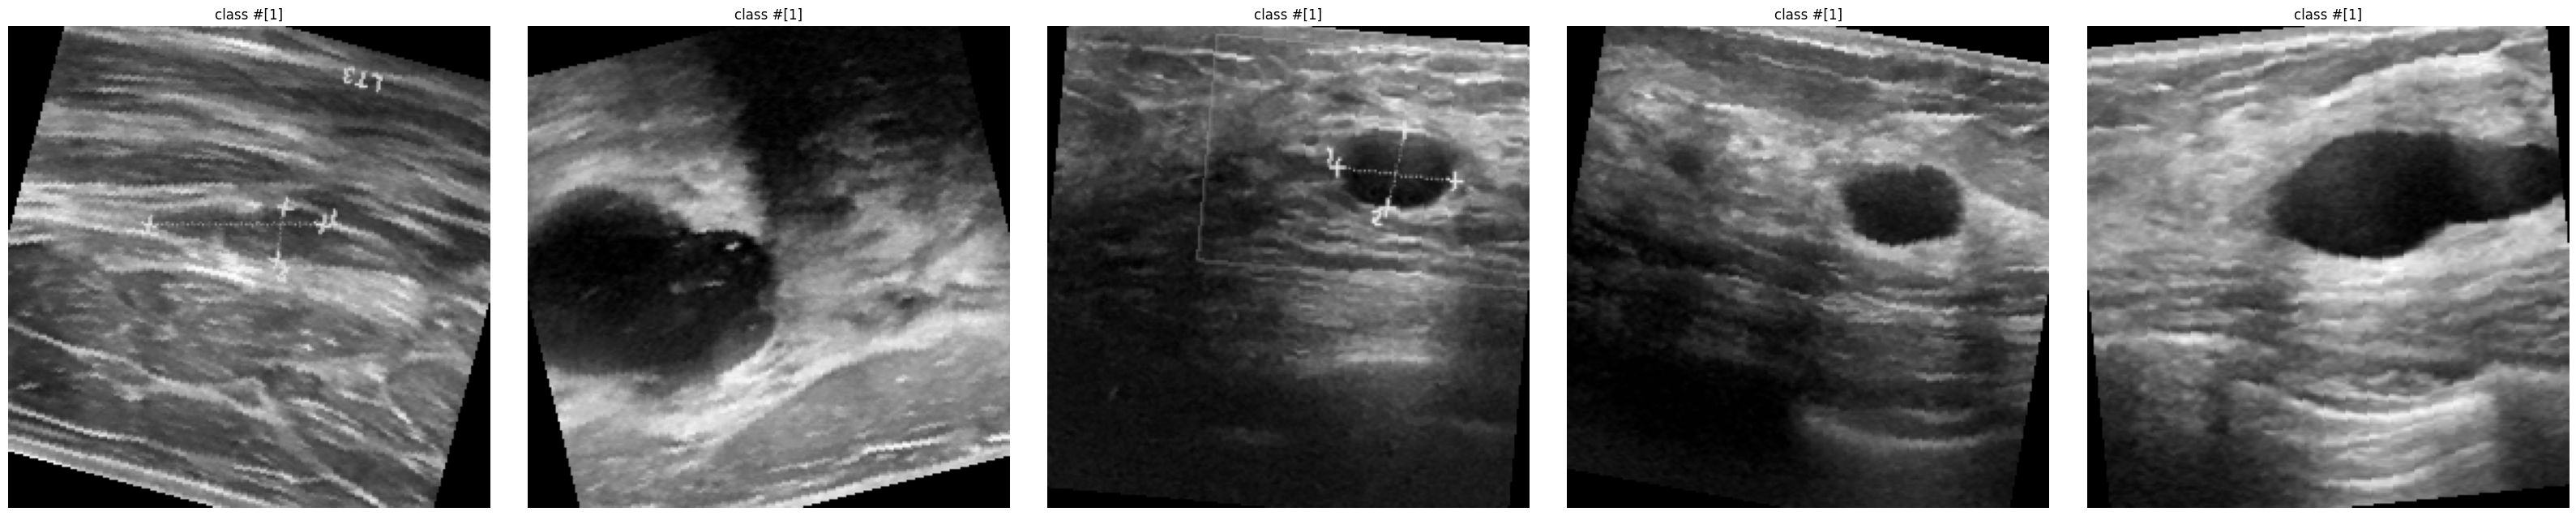

total number of training set: 546
Number of images for class 0: 147
Number of images for class 1: 399


In [ ]:
num_to_show = 5 # number of images to show
idx = np.random.choice(range(len(train_dataset)), num_to_show, replace=False) # randomly pick 5  pictures to show

fig = plt.figure(figsize=(32, 16))

for i in range(len(idx)):
    image,label = train_dataset[idx[i]]  # This unpacks the tuple returned by __getitem__ into separate image and label variables


    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image.squeeze(0)),cmap='gray') # Squeeze the tensor to remove the channel dimension since image is grayscale

plt.show()

print('total number of training set: {}'.format(len(train_dataset)))

# Print number of images for each class (0 and 1)
for i in range(2):  # Since there are only 2 classes: 0 and 1
    print('Number of images for class {}: {}'.format(i, np.sum(train_dataset.labels == i)))



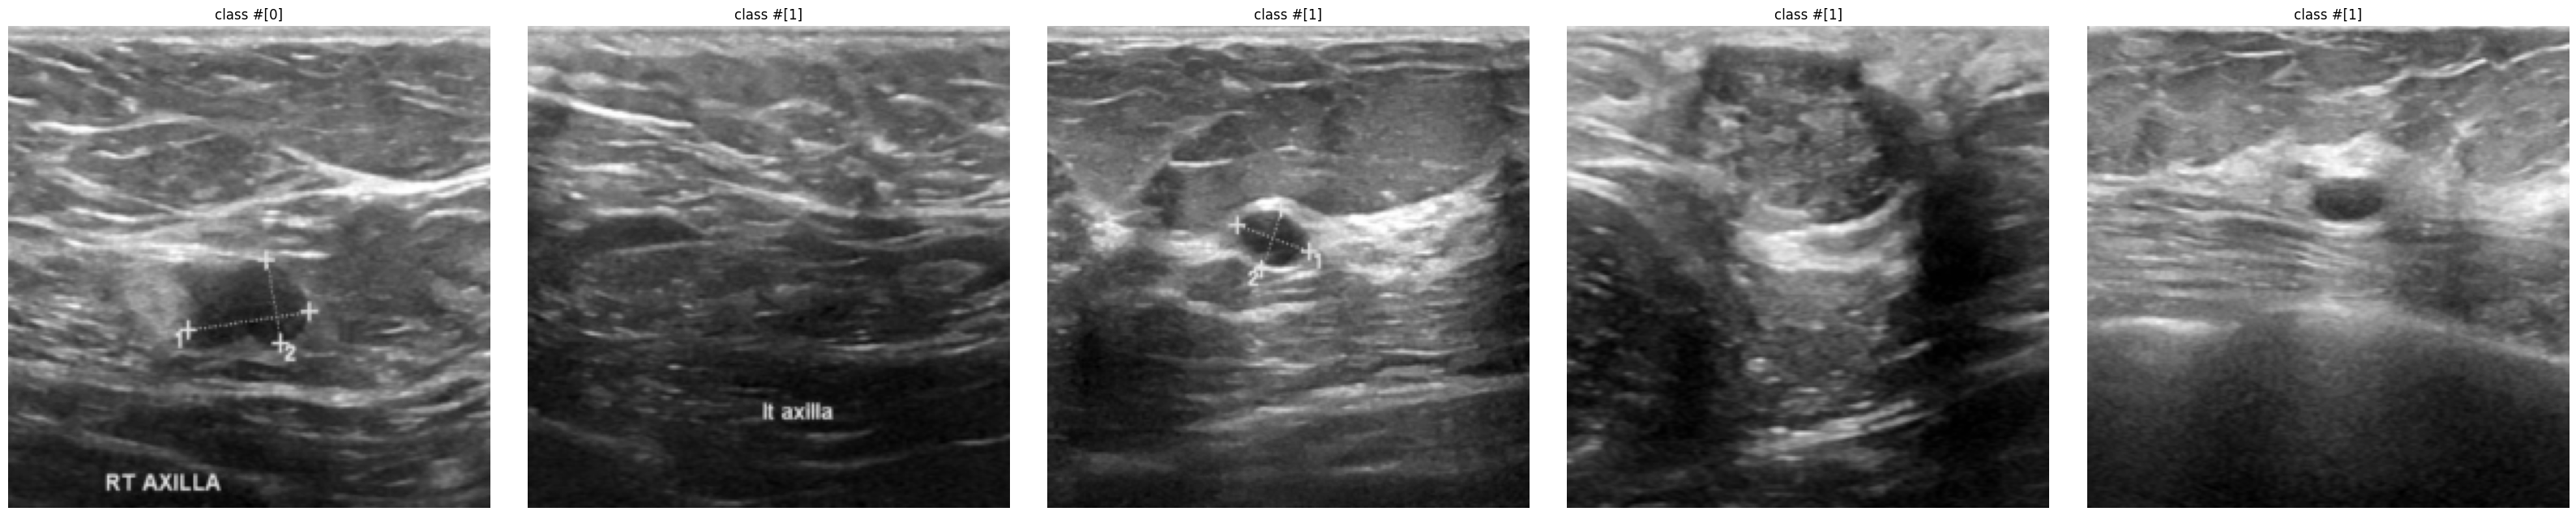

total number of training set: 156
Number of images for class 0: 42
Number of images for class 1: 114


In [ ]:
num_to_show = 5 # number of images to show
idx = np.random.choice(range(len(test_dataset)), num_to_show, replace=False) # randomly pick 5  pictures to show

fig = plt.figure(figsize=(32, 16))

for i in range(len(idx)):
    image,label = test_dataset[idx[i]]  # This unpacks the tuple returned by __getitem__ into separate image and label variables


    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image.squeeze(0)),cmap='gray') # Squeeze the tensor to remove the channel dimension since image is grayscale

plt.show()

print('total number of training set: {}'.format(len(test_dataset)))

# Print number of images for each class (0 and 1)
for i in range(2):  # Since there are only 2 classes: 0 and 1
    print('Number of images for class {}: {}'.format(i, np.sum(test_dataset.labels == i)))



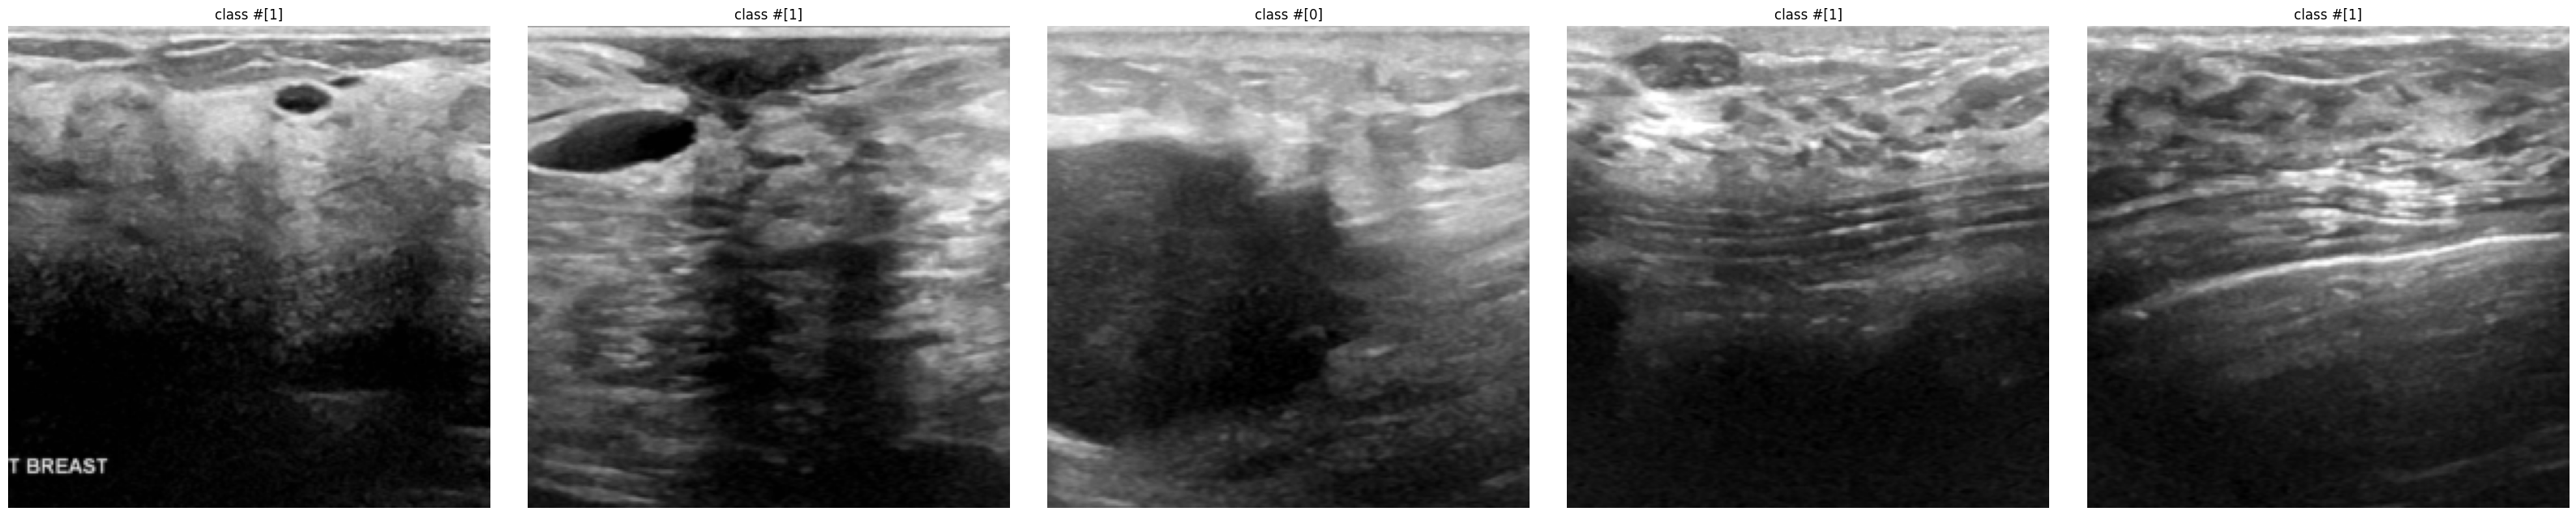

total number of training set: 78
Number of images for class 0: 21
Number of images for class 1: 57


In [ ]:
num_to_show = 5 # number of images to show
idx = np.random.choice(range(len(val_dataset)), num_to_show, replace=False) # randomly pick 5  pictures to show

fig = plt.figure(figsize=(32, 16))

for i in range(len(idx)):
    image,label = val_dataset[idx[i]]  # This unpacks the tuple returned by __getitem__ into separate image and label variables


    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label))
    ax.axis('off')
    plt.imshow(np.asarray(image.squeeze(0)),cmap='gray') # Squeeze the tensor to remove the channel dimension since image is grayscale

plt.show()

print('total number of training set: {}'.format(len(val_dataset)))

# Print number of images for each class (0 and 1)
for i in range(2):  # Since there are only 2 classes: 0 and 1
    print('Number of images for class {}: {}'.format(i, np.sum(val_dataset.labels == i)))



**STEP 4: Building a CNN Network for the classification task**

In [ ]:
import torch               #torch: This is the main PyTorch library and it gives the chance to perform tensor operations and many other utilities for deep learning.
import torch.nn as nn      #Imports the torch.nn module, which contains classes and functions to build neural networks.

# Set the seed for reproducibility
seed = 46
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

class CNN_Classification(nn.Module):       # The base class for all the neural network modules in pytorch is nn.Module.The CNN_Classification class inherits from the base class
    def __init__(self,num_classes):         #This intialize the (__init__ Method)/The constructor method that initializes the neural network layers.
        super().__init__()      #super().init()- This calls the the constructor of the base class nn.Module.

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  #Convolutional layer with 1 input channel, 32 output channels, and a 3x3 kernel.
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization layer for the first convolutional layer.
        self.relu1 = nn.ReLU()  # Activation function for the first convolutional layer.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with a 2x2 kernel and a stride of 2.
        self.dropout1 = nn.Dropout(p=0.2)  # Dropout layer with a dropout probability of 0.2.

        #The input tensor size is [batch_size,1,224,224]
        #during convolution the size changes as follows: [batch_size,1,222,222]
        #No tensor size change occurs during batch normalization and activation,during maxpooling the size becomes half
        #Output tensor of the first convolution layer is [batch_size,32,111,111]


        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # Convolutional layer with 32 input channels, 64 output channels, and a 3x3 kernel.
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(p=0.2)  # Dropout layer with a dropout probability of 0.2.

        #The input tensor size is [batch_size,32,111,111]
        #during convolution the size changes as follows: [batch_size,64,109,109]
        #No tensor size change occurs during batch normalization and activation,during maxpooling the size becomes half
        #Output tensor if the second convolution layer is [batch_size,64,54,54]

        #Here the output fromt he previous layer is flatten to feed into the fully connected layer
        self.fc1 = nn.Linear(64 * 54 * 54, 512)  # Fully connected layer with 512 output neurons
        self.relu3 = nn.ReLU()  # Activation function for the fully connected layer
        self.dropout3 = nn.Dropout(p=0.5)  # Dropout layer with a dropout probability of 0.5.
        self.fc2 = nn.Linear(512, num_classes)  # Fully connected layer with num_classes output neurons


        # If this is a multi class classification we can use num_class parameter to define the number of output classes.
        #Since this is a binary classification we dont use this here.But for multi class classification we need it.

    def forward(self, x):   #The foward propagation of the CNN network
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)


        x = x.view(-1, 64 * 54 * 54)  # Flatten the tensor to prepare it for the fully connected layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc2(x)


        return x


**Step 5 : Training and evaluating the CNN network**

First we have to create functions for training and evaluation.The normal flow of training and evaluation can be summarized as follows.

1. Instantiate an instance of  CNN_Classification class defined in step 4
2. When training, create an optimizer to take care of network's parameters,
3. calculate the loss and accuracy.

When evaluation, we only need to calculate the accuracy.

In [ ]:
"""
#Here we are defining two functions : One for training the CNN network and next for evaluating it.

Training:
The primary goal of training is to optimize the model parameters (weights) to minimize the loss function.
During training, we perform backpropagation to compute gradients and update the model weights based on these gradients.
we need to enable gradient computation and apply optimization algorithms to adjust the weights.

Evaluation:
The primary goal of evaluation is to assess how well the model performs on unseen data.
here we focus on metrics like accuracy, loss, precision, recall, etc., to understand how well the model generalizes to new data.
During evaluation, we do not want to update the model parameters or compute gradients; we only want to measure performance.
"""


def training(model, train_loader, criterion, optimizer, device):

    model.train()  # Set model to training mode.This activates behaviors specific to training, such as dropout layers or batch normalization, which behave differently during training and evaluation.
    running_loss = 0.0  # Initializes a variable to accumulate the total loss over all batches.This helps in computing the average loss for the entire epoch.

    for images, labels in train_loader:   #Iterates over the training data batches.
        images, labels = images.to(device), labels.to(device)   # Moves data to the appropriate computing device (CPU or GPU).device is typically 'cuda' for GPU or 'cpu'. This ensures that both the model and data are on the same device.

        optimizer.zero_grad()  # Zero the parameter gradients. Clears old gradients from the previous step.Before computing new gradients, we need to reset the gradients to avoid accumulation from previous iterations.

        outputs = model(images)   # This performs the foward propagation and give the predictions
        loss = criterion(outputs, labels.float())  #Computes the loss between the model’s predictions and the true labels.outputs.squeeze() removes any extra dimensions, and labels.float() ensures the labels are in the correct format for the loss function.
        loss.backward()  # Backward pass - here the gradients of the loss is calculated with respect to the parameters/weights
        optimizer.step()  # Optimize the model - Updates the model parameters based on the computed gradients. This applies the optimization algorithm (e.g., Adam) to adjust the model weights.

        running_loss += loss.item() * images.size(0)  #loss.item - Accumulates the loss for the current batch and image.size(0) is the batch size.

        #Here we are multiplying by batch size - To scale the loss by batch size.The loss per sample is multiplied by the batch size,then we get the total loss for that entire batch

    train_loss = running_loss / len(train_loader.dataset)   #Computes the average loss for the epoch. - Since running loss is the total sum of the loss over all the batch ,we can get average by dividing by no of batches
    print(f"Training Loss: {train_loss:.4f}")

    return train_loss


def evaluating(model, val_loader, criterion, device,best_val_loss):


    model.eval()  # Set model to evaluation mode/This deactivates behaviors specific to training (e.g., dropout) and sets the model to use running statistics for batch normalization.
    running_loss = 0.0   # This initialize a variable to accumulate the total loss over all batches/computing average loss for validation set
    corrects = 0   #This variable is intialized to count the no of correct predictions,basically used to measure the accuracy of the model

    with torch.no_grad():       #This disables gradient calculation to save memory and compuatation,because we dont need any gradients during evaluation
        for images, labels in val_loader:    # Iterates over batches of images and labels from the validation dataset.
            images, labels = images.to(device), labels.to(device)  # Moves data to the appropriate computing device (CPU or GPU)/to ensure that model and data are on the same device

            outputs = model(images)   # Foward propagation/here the model process the images of the validation set and provide the prediction
            loss = criterion(outputs, labels.float()) #The output of the foward pass is squeezed and then loss is computed between the input images and the predictions

            running_loss += loss.item() * images.size(0)  # Accumulate the loss for the current batch.
            preds = (outputs > 0.5).float()  # Convert logits to binary predictions.
            corrects += (preds == labels).sum().item()  # Count the number of correct predictions.

    val_loss = running_loss / len(val_loader.dataset)  # Compute the average loss for the validation set.
    val_acc = corrects / len(val_loader.dataset)  # Compute the accuracy of the model.
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), '/content/drive/My Drive/Colab Notebooks/best_model_BreastMNIST_224.pth')
        print("Best model saved with loss: {:.4f}".format(best_val_loss))

    return val_loss, val_acc,best_val_loss



Epoch 1/10
Training Loss: 17.7984
Validation Loss: 2.9282, Validation Accuracy: 64.10%
Best model saved with loss: 2.9282
Best model saved with loss: 2.9282
Epoch 2/10
Training Loss: 8.7892
Validation Loss: 3.0406, Validation Accuracy: 78.21%
Epoch 3/10
Training Loss: 3.4447
Validation Loss: 2.0521, Validation Accuracy: 74.36%
Best model saved with loss: 2.0521
Best model saved with loss: 2.0521
Epoch 4/10
Training Loss: 1.3872
Validation Loss: 0.6261, Validation Accuracy: 82.05%
Best model saved with loss: 0.6261
Best model saved with loss: 0.6261
Epoch 5/10
Training Loss: 0.6820
Validation Loss: 0.5154, Validation Accuracy: 71.79%
Best model saved with loss: 0.5154
Best model saved with loss: 0.5154
Epoch 6/10
Training Loss: 0.5817
Validation Loss: 0.4863, Validation Accuracy: 82.05%
Best model saved with loss: 0.4863
Best model saved with loss: 0.4863
Epoch 7/10
Training Loss: 0.5651
Validation Loss: 0.5210, Validation Accuracy: 70.51%
Epoch 8/10
Training Loss: 0.5534
Validation Los

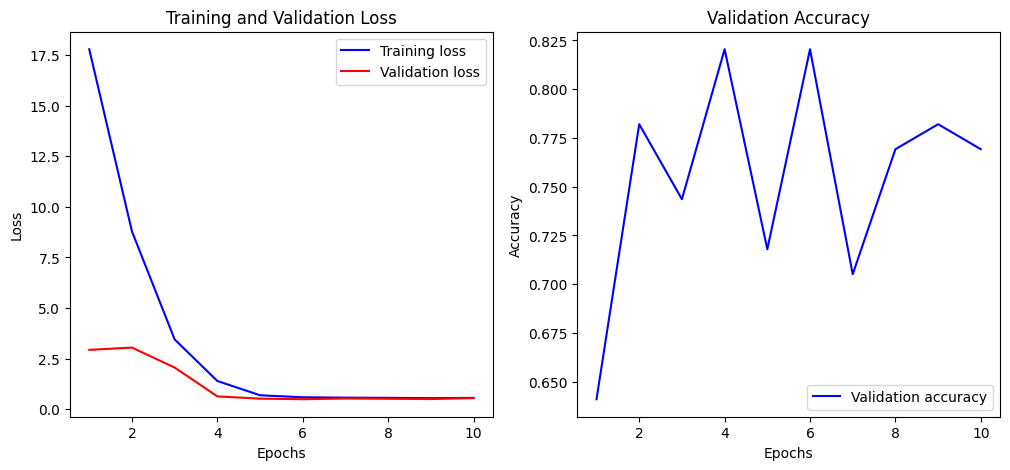

In [ ]:
import torch.optim as optim

# instantiate a network
model = CNN_Classification(num_classes=1)

#Instantiate the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Main training loop
num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_loss = training(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc ,best_val_loss= evaluating(model, val_loader, criterion, device,best_val_loss)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**STEP 5: Testing the model**

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/best_model_BreastMNIST_224.pth')) # Loading the best model
evaluating(model, test_loader, criterion, device,best_val_loss)  # Evaluating the model on the test set

Validation Loss: 0.4921, Validation Accuracy: 74.36%


(0.49209818091147983, 0.7435897435897436, 0.4862970251303453)

**STEP 6 : Performance metrices**



FOR VALIDATION DATASET
Accuracy: 0.7821
Precision: 0.8030
Recall: 0.9298
F1 Score: 0.8618
AUC-ROC: 0.6554
Confusion Matrix:
[[ 8 13]
 [ 4 53]]


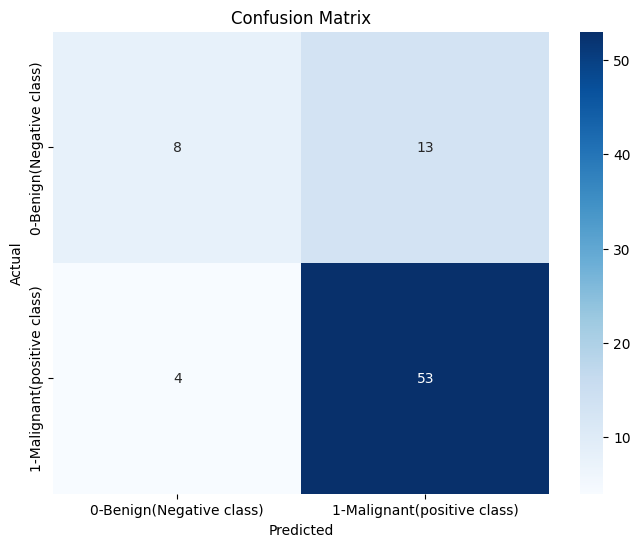

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

def compute_metrics(model, data_loader, device):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy()
            preds = (preds > 0.5).astype(int)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds)

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    auc_roc = roc_auc_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)


    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    # Define class names
    class_names = ['0-Benign(Negative class)', '1-Malignant(positive class)']

     # Creating a confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

print("FOR VALIDATION DATASET")
compute_metrics(model,val_loader,device)


FOR TEST DATASET
Accuracy: 0.7564
Precision: 0.7714
Recall: 0.9474
F1 Score: 0.8504
AUC-ROC: 0.5927
Confusion Matrix:
[[ 10  32]
 [  6 108]]


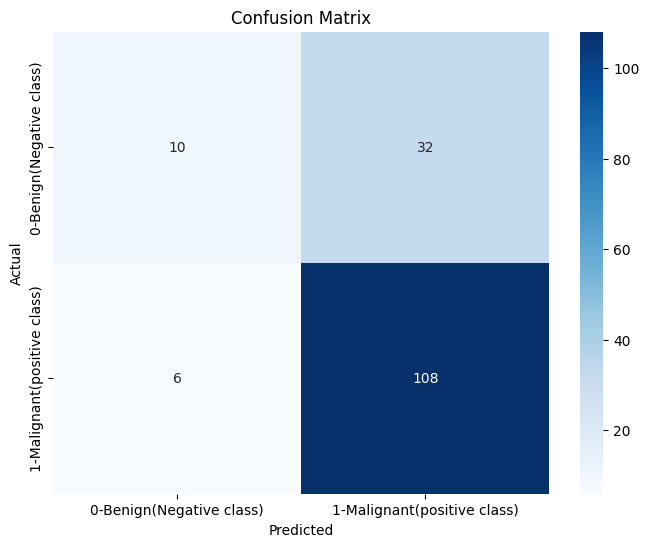

In [ ]:
print("FOR TEST DATASET")
compute_metrics(model,test_loader,device)

**True Positives (TP): 108 (correctly predicted malignant cases)**

**True Negatives (TN): 10 (correctly predicted benign cases)**

**False Positives (FP): 32 (benign cases incorrectly predicted as malignant)**

**False Negatives (FN): 6 (malignant cases incorrectly predicted as benign)**


Accuracy is the proportion of correctly classified instances (both true positives and true negatives) among all instances.


Precision (also called Positive Predictive Value) is the proportion of positive predictions that are actually correct.

Recall (also called Sensitivity or True Positive Rate) is the proportion of actual positives that are correctly identified.

F1 Score is the harmonic mean of precision and recall, providing a balance between the two.


The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) measures the ability of the classifier to distinguish between classes. A value of 0.5 suggests no discrimination (random guessing), whereas a value of 1 indicates perfect discrimination.

An AUC-ROC of 0.5927 is slightly better than random guessing but indicates there is room for improvement.

Interpretation:

**High Recall: The model is good at identifying most malignant cases, which is crucial in medical diagnoses to ensure that malignant cases are not missed.**

**Lower Precision: There are a relatively high number of false positives (benign cases predicted as malignant). This could lead to unnecessary worry or additional tests for patients.**

**Accuracy: Indicates that around 75.64% of all predictions (both classes) are correct.**

**F1 Score: A balanced metric indicating the trade-off between precision and recall. An F1 score of 0.8527 is relatively good, especially given the high recall.**
**AUC-ROC: Indicates some discrimination ability, but there's significant room for model improvement.**

















##SUMMARY:

1.The dataset linked with BreastMNIST_224 is an imbalanced dataset.To handle any biasness due to imbalanceness,**data augmentations** are used.

Few other options could be included into the model incase of an imbalanced dataset
*  Use of a **weighted loss function**
*  Define a **custom dataset** consisting of augmented images to increase the size of the respective classes

2.The **accuracy is not a proper metrix** to be used to measure the model performance in case of an imbalanced dataset.Instead **recall,precision,F1 score,AUC-ROC curve and confusion matrix** can be used.

3.Few regularization techniques like **batch normalization,dropout and early stopping** is used in this CNN model

4. Few **hyperparameter tunings** are done to obtain the optimum parameters


##REFERENCES

1. Jiancheng Yang, Rui Shi, Donglai Wei, Zequan Liu, Lin Zhao, Bilian Ke, Hanspeter Pfister, Bingbing Ni. Yang, Jiancheng, et al. "MedMNIST v2-A large-scale lightweight benchmark for 2D and 3D biomedical image classification." Scientific Data, 2023.

2. Jiancheng Yang, Rui Shi, Bingbing Ni. "MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis". IEEE 18th International Symposium on Biomedical Imaging (ISBI), 2021.


